# Clase2b: Introducción al uso de python para la manipulación de imágenes satelitales. 

Lo que veremos en esta notebook:

- [x] Lectura de una imagen satelital en formato geotiff
- [x] Extracción de los metadatos principales de una imagen satelital
- [x] Geotransformaciones
- [x] Lectura de matriz de datos
- [x] Visualización de una imagen satelital de una sola banda
- [x] Formato HDF

# 1. Imágenes satelitales
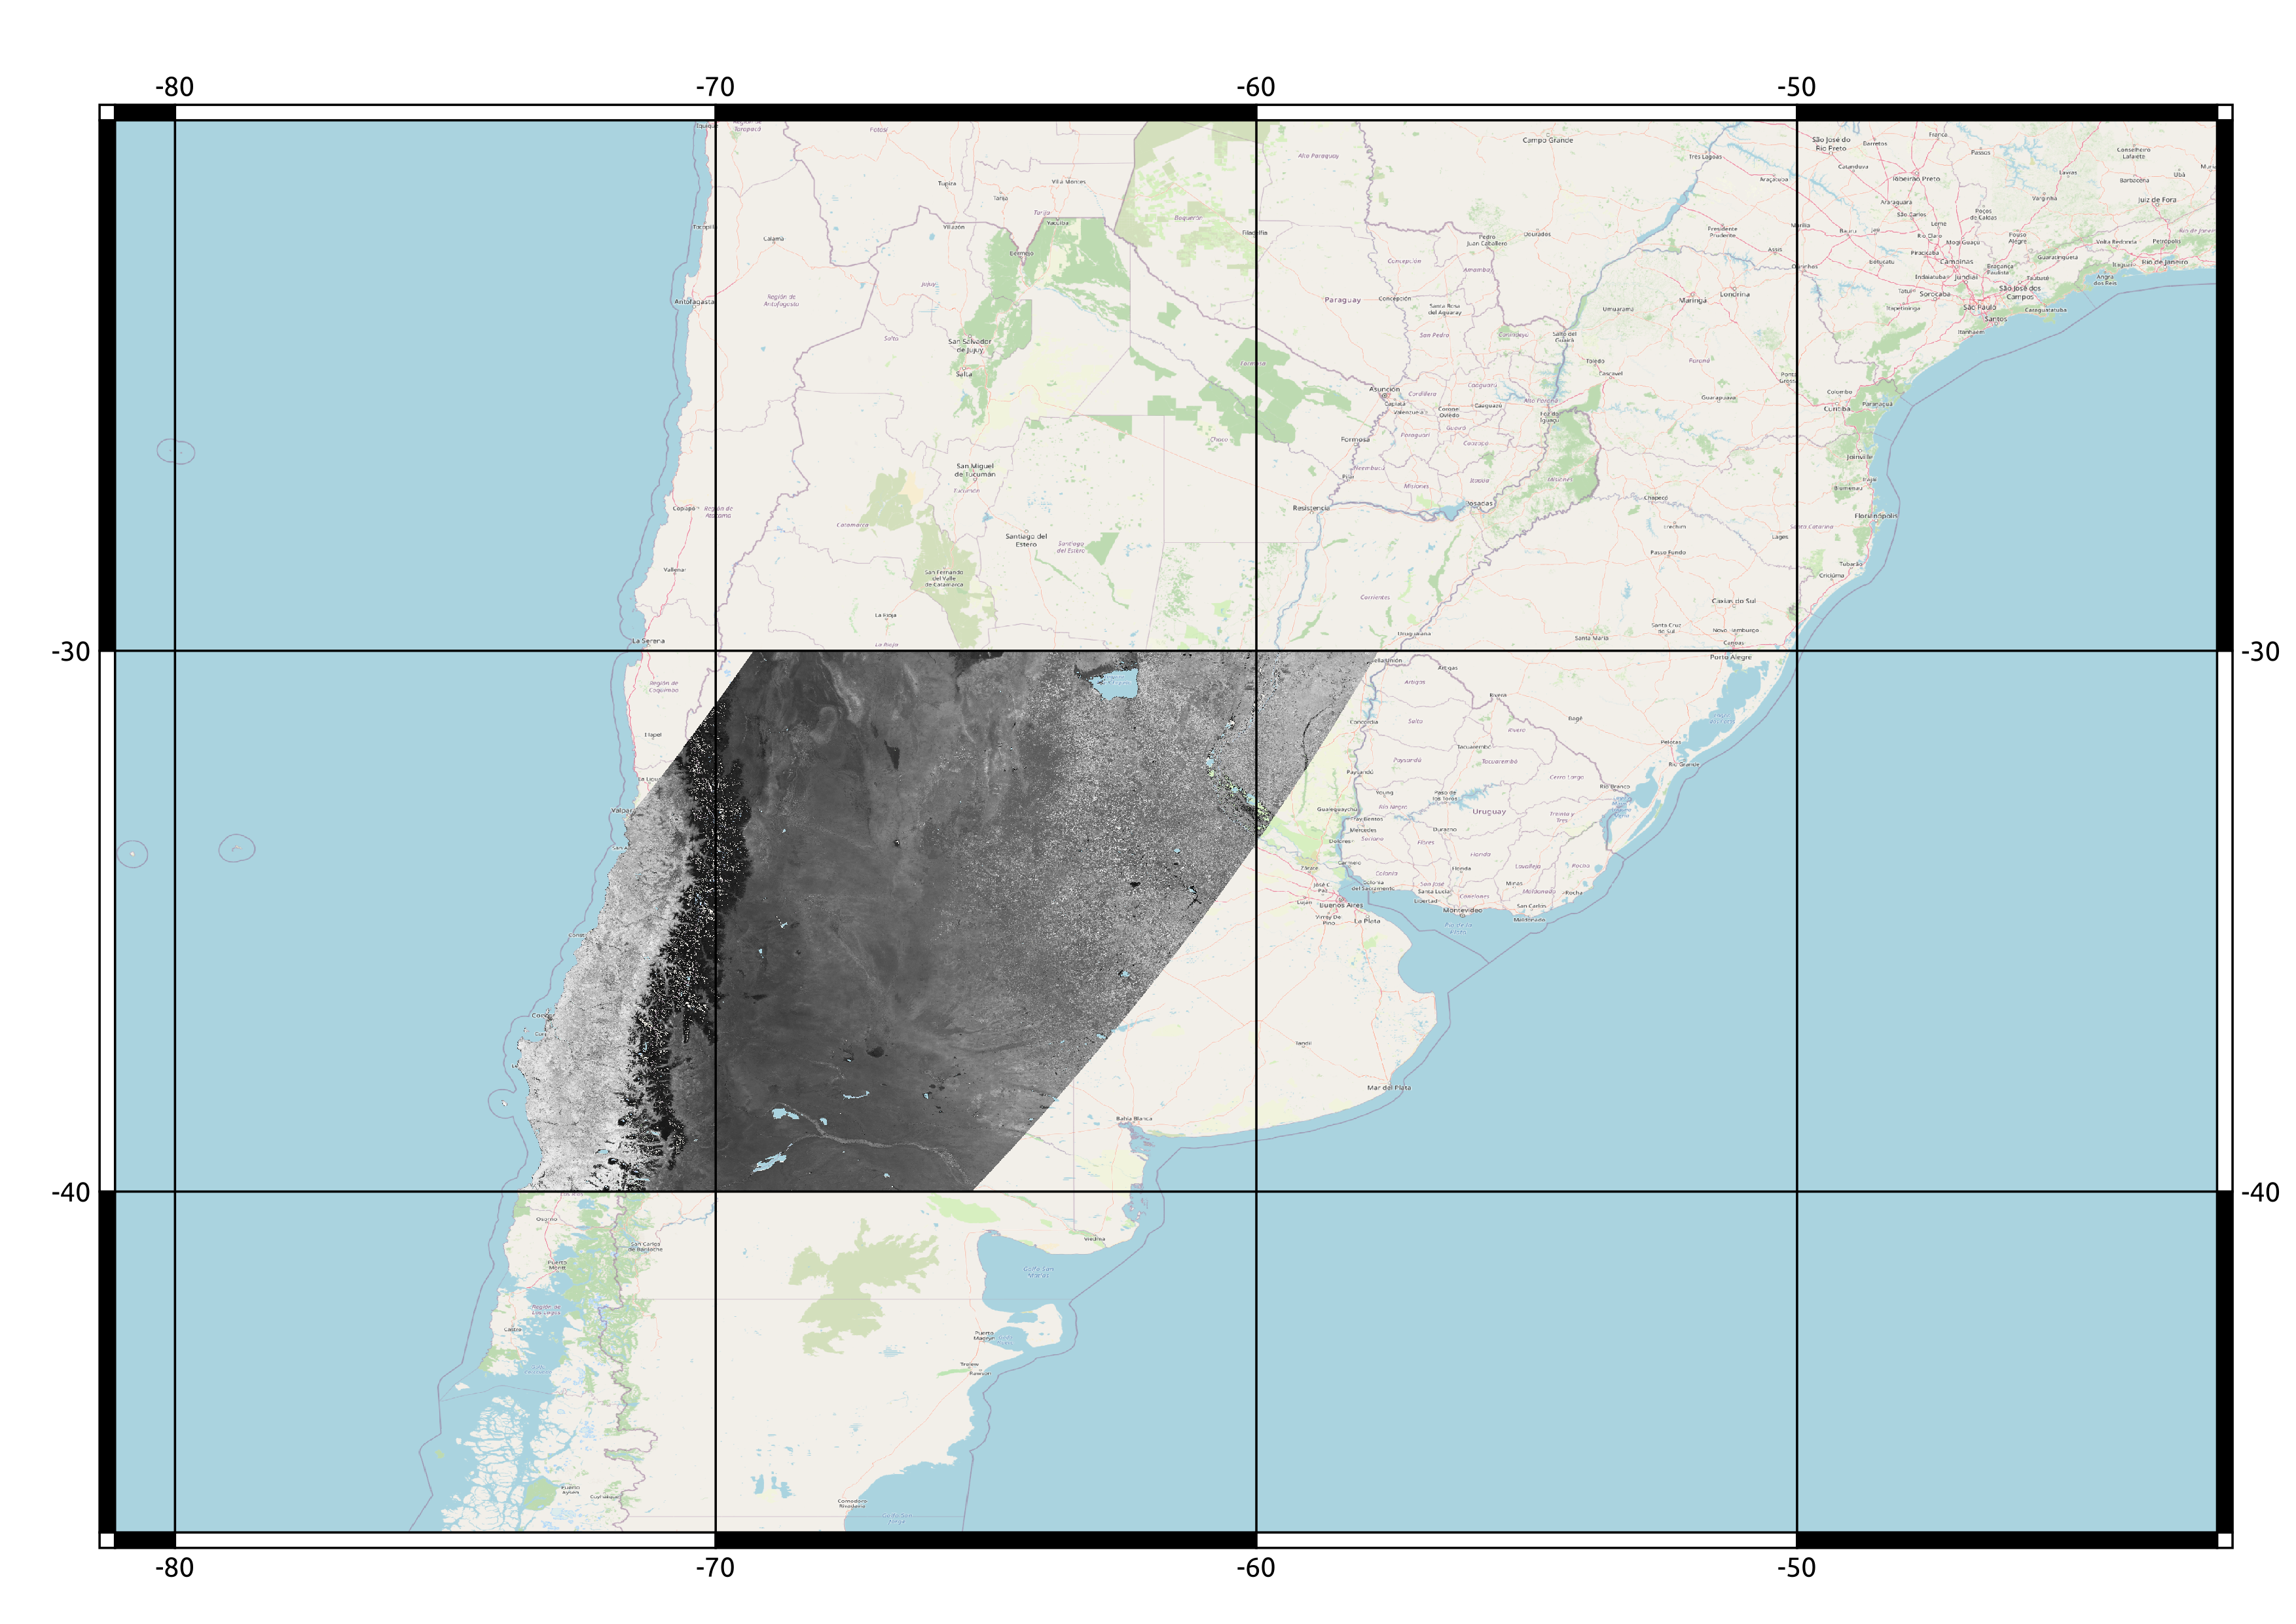

### ¿Qué información podremos extraer de una imagen satelital?
### ¿Cómo podemos acceder a dicha información?

# 2. Librería gdal
Es una librería utilizada para la lectura y procesamiento de datos geoespaciales de tipo ráster (gdal) y vectoriales (ogr). Es base para librerías de más alto nivel como rasterio. Existen 5 paquetes principales vinculados a gdal, los cuales, desde 2015 se importan de la siguiente manera: 

```python
from osgeo import gdal        # Manejo de datos Ráster
from osgeo import ogr         # Manejo de datos Vectoriales
from osgeo import osr         # Manejo de sistemas de referencia
from osgeo import gdal_array
from osgeo import gdalconst
```

Para información en detalle sobre la librería se puede consultar el siguiente [enlace](https://gdal.org/).


## 2.1. Información básica de un ráster

Comencemos por cargar las siguientes librerías:

```python
import matplotlib.pyplot as plt
from termcolor import colored
from osgeo import gdal
from osgeo import osr
import numpy as np
```

In [1]:
import matplotlib.pyplot as plt
from termcolor import colored
from osgeo import gdal
from osgeo import osr
import numpy as np

En la carpeta _raw_data_ tenemos una imagen llamada _SPOT_20170806_PAN.tif_. Haciendo uso de la función `gdal.Info()`, vamos a explorar parte de su estructura:

```python
print(gdal.Info('../data/raw_data/SPOT_20170806_PAN.tif', format='json'))
```

In [2]:
print(gdal.Info("./raw_data/SPOT_20170806_PAN.tif", format="json"))

{'description': './raw_data/SPOT_20170806_PAN.tif', 'driverShortName': 'GTiff', 'driverLongName': 'GeoTIFF', 'files': ['./raw_data/SPOT_20170806_PAN.tif'], 'size': [7204, 3956], 'coordinateSystem': {'wkt': 'PROJCRS["WGS 84 / UTM zone 20S",\n    BASEGEOGCRS["WGS 84",\n        DATUM["World Geodetic System 1984",\n            ELLIPSOID["WGS 84",6378137,298.257223563,\n                LENGTHUNIT["metre",1]]],\n        PRIMEM["Greenwich",0,\n            ANGLEUNIT["degree",0.0174532925199433]],\n        ID["EPSG",4326]],\n    CONVERSION["UTM zone 20S",\n        METHOD["Transverse Mercator",\n            ID["EPSG",9807]],\n        PARAMETER["Latitude of natural origin",0,\n            ANGLEUNIT["degree",0.0174532925199433],\n            ID["EPSG",8801]],\n        PARAMETER["Longitude of natural origin",-63,\n            ANGLEUNIT["degree",0.0174532925199433],\n            ID["EPSG",8802]],\n        PARAMETER["Scale factor at natural origin",0.9996,\n            SCALEUNIT["unity",1],\n        

De la misma manera, `gdal` nos permite Vamos a cargar nuestra imagen como objeto y acceder a dicha estructura:

```python
ds = gdal.Open('../data/raw_data/SPOT_20170806_PAN.tif')
print(ds)

print(ds.GetMetadata())
```

In [4]:
ds = gdal.Open("./raw_data/SPOT_20170806_PAN.tif")
print(ds)

print(ds.GetMetadata())

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x00000228F56AECC0> >
{'AREA_OR_POINT': 'Area'}


Existen algunos comandos para acceder a la información básica de nuestros datos ráster también llamados _metadatos_. Estos proporcionan información acerca de las características de cada uno de nuestros recursos. Veamos como extraer información con la librería _gdal_: 

```python
print(ds.GetFileList())
print(ds.GetDescription())
```

In [5]:
print(ds.GetFileList())
print(ds.GetDescription())

['./raw_data/SPOT_20170806_PAN.tif']
./raw_data/SPOT_20170806_PAN.tif


```python
print(colored('Número de bandas:', 'blue'), ds.RasterCount)
print(colored('Número de columnas:', 'blue'), ds.RasterXSize)
print(colored('Número de filas:', 'blue'), ds.RasterYSize)
```

In [6]:
print(colored('Número de bandas:', 'blue'), ds.RasterCount)
print(colored('Número de columnas:', 'blue'), ds.RasterXSize)
print(colored('Número de filas:', 'blue'), ds.RasterYSize)

Número de bandas: 1
Número de columnas: 7204
Número de filas: 3956


Podemos adicionalmente obtener datos acerca del sistema de referencia de la imagen, así como del formato de la misma:

```python
# Obtener información acerca del formato de la imagen
print(colored('Obtener el formato como objeto:\n', 'blue'), ds.GetDriver(), '\n')
print(colored('Nombre largo del formato:', 'blue'), ds.GetDriver().LongName, '\n')
print(colored('Abreviación del formato:', 'blue'), ds.GetDriver().ShortName)
```

In [7]:
print(colored('Obtener el formato como objeto:\n', 'blue'), ds.GetDriver(), '\n')
print(colored('Nombre largo del formato:', 'blue'), ds.GetDriver().LongName, '\n')
print(colored('Abreviación del formato:', 'blue'), ds.GetDriver().ShortName)

Obtener el formato como objeto:
 <osgeo.gdal.Driver; proxy of <Swig Object of type 'GDALDriverShadow *' at 0x00000228D53D8E70> > 

Nombre largo del formato: GeoTIFF 

Abreviación del formato: GTiff


Los drivers son necesarios cuando necesitamos guardar nuestras imágenes de salida. Estos se pueden traer desde la imagen original, como vimos anteriormente, así como crear a partir de su nombre abreviado, por ejemplo:

```python
new_driver = gdal.GetDriverByName('GTiff')
print(colored('Obtener el formato como objeto:\n', 'blue'), new_driver, '\n')
print(colored('Nombre largo del formato:', 'blue'), new_driver.LongName, '\n')
print(colored('Abreviación del formato:', 'blue'), new_driver.ShortName)
```

In [8]:
new_driver = gdal.GetDriverByName('GTiff')
print(colored('Obtener el formato como objeto:\n', 'blue'), new_driver, '\n')
print(colored('Nombre largo del formato:', 'blue'), new_driver.LongName, '\n')
print(colored('Abreviación del formato:', 'blue'), new_driver.ShortName)

Obtener el formato como objeto:
 <osgeo.gdal.Driver; proxy of <Swig Object of type 'GDALDriverShadow *' at 0x00000228D53D8D80> > 

Nombre largo del formato: GeoTIFF 

Abreviación del formato: GTiff


Más información acerca de los formatos disponibles la encontrarán en el siguiente [enlace](https://gdal.org/drivers/raster/index.html).

Otra información importante corresponde al sistema de referencia de coordenadas (SRC). Esto nos indica en qué proyección y qué unidades de mapa estamos trabajando. 

Cuando trabajamos con más de una imagen, deberíamos asegurarnos que estas se encuentren en el mismo sistema de referencia, así como el mísmo tamaño de píxel, garantizando la correspondencia entre los datos de la matríz.

```python
# Obtener proyección a partir de una imagen georreferenciada
# Información General
print(colored('Información acerca de la proyección de la capa:\n', 'blue'),
      ds.GetProjection(), '\n')

# Código EPSG
proj = osr.SpatialReference(wkt=ds.GetProjection())
print(colored('Código EPSG: ', 'blue'), proj.GetAttrValue("AUTHORITY", 1))
```

In [9]:
print(colored('Información acerca de la proyección de la capa:\n', 'blue'),
      ds.GetProjection(), '\n')

# Código EPSG
proj = osr.SpatialReference(wkt=ds.GetProjection())
print(colored('Código EPSG: ', 'blue'), proj.GetAttrValue("AUTHORITY", 1))

Información acerca de la proyección de la capa:
 PROJCS["WGS 84 / UTM zone 20S",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-63],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",10000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32720"]] 

Código EPSG:  32720


O de manera inversa, creamos nuestra proyección a partir de un EPSG conocido:
```python
# Crear proyección a partir de código EPSG
spatialRef = osr.SpatialReference()
spatialRef.ImportFromEPSG(32720)
print(spatialRef)
```

In [10]:
spatialRef = osr.SpatialReference()
spatialRef.ImportFromEPSG(32720)
print(spatialRef)

PROJCS["WGS 84 / UTM zone 20S",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",-63],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",500000],
    PARAMETER["false_northing",10000000],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH],
    AUTHORITY["EPSG","32720"]]


## 2.2. Geotransformaciones

Consiste en una tupla de 6 valores que contienen la información necesaria para realizar la transformación de matriz, a imagen georreferenciada en un mapa. Contiene los siguientes elementos:


>**GT(0)** = Coordenada x de la esquina superior izquierda del píxel superior izquierdo de la matriz\
**GT(1)** = Tamaño del píxel en sentido Oeste-Este\
**GT(2)** = Parámetro de rotación de las filas (Normalmente es cero)\
**GT(3)** = Coordenada y de la esquina superior izquierda del píxel superior izquierdo de la matriz\
**GT(4)** = Parámetro de rotación de las columnas (Normalmente es cero)\
**GT(5)** = Tamaño del píxel en sentido Norte-Sur (Este valor normalmente es negativo si el norte de la imagen coincide con la parte superior de la matriz)

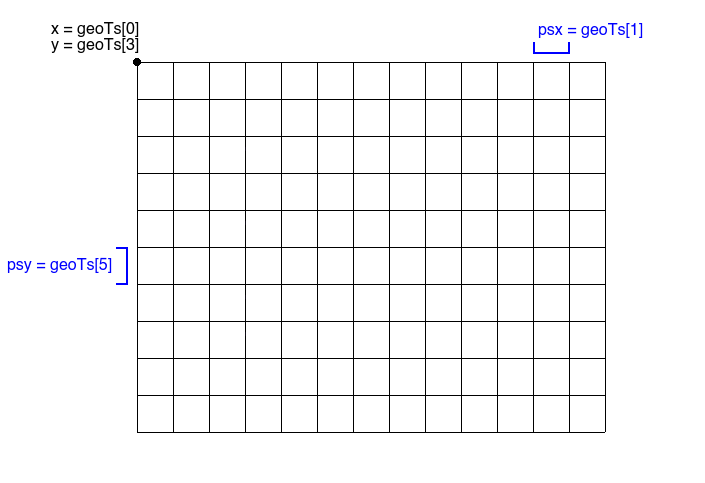

#### Cómo funciona?

X_geo = GT(0) + X_pixel * GT(1) + Y_line * GT(2)

Y_geo = GT(3) + X_pixel * GT(4) + Y_line * GT(5)

Para obtener más información acerca de las Geotransformaciones vaya al siguiente [enlace](https://gdal.org/tutorials/geotransforms_tut.html)

Los parámetros de Geotransformación de la imagen se obtienen de la siguiente manera:

```python
geoTs = ds.GetGeoTransform()
print(geoTs)
```

In [11]:
geoTs = ds.GetGeoTransform()
print(geoTs)

(388866.0, 1.5, 0.0, 6528056.0, 0.0, -1.5)


Veamos cómo obtener la coordenada central del píxel (200, 300) de la imagen cargada anteriormente a partir de sus geotransformaciones:

```python
p_x = 300
p_y = 200

ulx = geoTs[0]
uly = geoTs[3]

p_size_x = geoTs[1]
p_size_y = geoTs[5]

coord_x = ulx + p_x*p_size_x + 0  # geoTs[0] + p_x*geoTs[1] + p_y*geoTs[2]
coord_y = uly + 0 + p_y*p_size_y  # geoTs[3] + p_x*geoTs[4] + p_y*geoTs[5]

print(f'Coordenadas x, y, esquina superior izquierda del pixel ({p_y}, {p_x}):')
print(f'{coord_x:.3f}, {coord_y:.3f}')
print(f'Coordenadas x, y, centro del pixel ({p_y}, {p_x}):')
print(f'{coord_x + p_size_x/2:.3f}, {coord_y + p_size_y/2:.3f}')
```

In [12]:
p_x = 300
p_y = 200

ulx = geoTs[0]
uly = geoTs[3]

p_size_x = geoTs[1]
p_size_y = geoTs[5]

coord_x = ulx + p_x*p_size_x + 0  # geoTs[0] + p_x*geoTs[1] + p_y*geoTs[2]
coord_y = uly + 0 + p_y*p_size_y  # geoTs[3] + p_x*geoTs[4] + p_y*geoTs[5]

print(f'Coordenadas x, y, esquina superior izquierda del pixel ({p_y}, {p_x}):')
print(f'{coord_x:.3f}, {coord_y:.3f}')
print(f'Coordenadas x, y, centro del pixel ({p_y}, {p_x}):')
print(f'{coord_x + p_size_x/2:.3f}, {coord_y + p_size_y/2:.3f}')

Coordenadas x, y, esquina superior izquierda del pixel (200, 300):
389316.000, 6527756.000
Coordenadas x, y, centro del pixel (200, 300):
389316.750, 6527755.250


## 2.3. El método ReadAsArray

Recordemos que las imágenes son matrices de datos donde, en el caso de las imágenes satelitales, estos corresponden a valores de radiación medidos por el sensor. Vamos ahora a extraer esos valores, para lo cual, ejecutaremos el siguiente comando:

```python
band = ds.GetRasterBand(1)
sds = band.ReadAsArray()
```

In [13]:
band = ds.GetRasterBand(1)
sds = band.ReadAsArray()

#### Responder:

- Qué tipo de objeto es sds?

- Cuantas filas y columnas tiene el objeto sds?

- Qué tipo de datos tiene el objeto sds?

In [14]:
type(sds) # Es del tipo de objeto numpy.ndarray

numpy.ndarray

In [15]:
sds.shape # 3956 filas, 7204 columnas

(3956, 7204)

In [16]:
sds.dtype

dtype('uint16')

El método ***ReadAsArray()*** brinda diferentes opciones para acceder a los valores de la matriz. Si vamos a la ayuda del mismo, veremos la definición del método y sus posibles opciones. Las más importantes son:

>**xoff** = Columna a partir de la cual se realizará la lectura de la matriz de datos. Por defecto es cero (0). \
**yoff** = Fila a partir de la cual se realizará la lectura de la matriz de datos. Por defecto es cero (0).\
**win_xsize** = Número de columnas a leer / ancho de la ventana. Por defecto lee el total de columnas.\
**win_ysize** = Número de filas a leer / alto de la ventana. Por defecto lee el total de filas.\
**buf_xsize** = Número de columnas del array de salida. Por defecto es igual a win_xsize. En caso de definirse un 
valor diferente, se realizará un remuestreo de los datos.\
**buf_ysize** = Número de filas del array de salida. Por defecto lee el total de filas. En caso de definirse un valor diferente se realizará un remuestreo de los datos.\
**buf_obj** = Objeto de tipo 'numpy.ndarray' donde se escribirán los datos en caso de no querer crear una nueva imagen. En caso de no coincidir las dimensiones, los datos serán remuestreados.

Para profundizar en este tema pueden ir al siguiente [enlace](https://livebook.manning.com/book/geoprocessing-with-python/chapter-9/28).

Probemos el siguiente código:
```python
# ds.GetRasterBand(1).ReadAsArray(xoff, yoff, win_xsize, win_ysize)
sds2 = ds.GetRasterBand(1).ReadAsArray(100, 100, 1500, 1500)
print(sds2.shape)
```

In [17]:
sds2 = ds.GetRasterBand(1).ReadAsArray(100, 100, 1500, 1500)
print(sds2.shape)

(1500, 1500)


### Ejercicio 2.1:

1. A partir de las siguientes coordenadas:
 ```
 ul_x, ul_y = 389015.794, 6527907.484 # Esquina superior izquierda
 lr_x, lr_y = 391265.904, 6525657.498 # Esquina inferior derecha
 ```
 Calcule los parámetros x_off, y_off, win_xsize y win_ysize. Cargue el array de la imagen siguiendo la estructura que se muestra a continuación y visualícela:
```python
sds_subset = ds.GetRasterBand(1).ReadAsArray(x_off, y_off, win_xsize, win_ysize)

fig, ax = plt.subplots(figsize=(15, 8))
ax.imshow(sds_subset, cmap='Greys_r')
ax.set_title('Subset')
plt.show()
```
 Recuerde que los parámetros de entrada deben ser números enteros.
 
 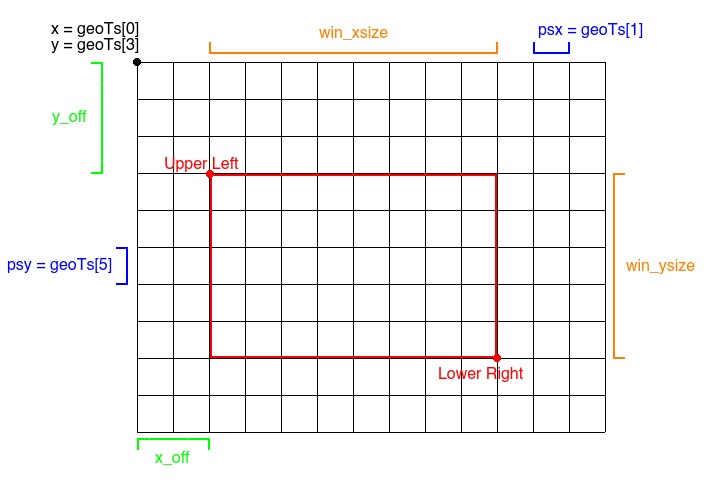
 
2. A partir del código anterior, defina una función que genere un recorte a partir de unas coordenadas y una imagen suministrada. La función deberá tener la siguiente estructura:

```python
ul_x, ul_y = 389015.794, 6527907.484
lr_x, lr_y = 391265.904, 6525657.498

ds = gdal.Open('../data/raw_data/SPOT_20170806_PAN.tif')


def subset_img(ds, ulx, uly, lrx, lry):
    '''
    Descripción de la función
    '''

    # código....

    return subset

subset = subset_img(ds, ul_x, ul_y, lr_x, lr_y)
 
```


In [20]:
# Resolución del ejercicio
ul_x, ul_y = 389015.794, 6527907.484  # esquina superior izquierda
lr_x, lr_y = 391265.904, 6525657.498  # esquina inferior derecha


ds = gdal.Open("./raw_data/SPOT_20170806_PAN.tif")
gt = ds.GetGeoTransform()

origin_x, pixel_width, _, origin_y, _, pixel_height = gt

x_off = int((ul_x - origin_x) / pixel_width)
y_off = int((ul_y - origin_y) / pixel_height)

win_xsize = int((lr_x - ul_x) / pixel_width)
win_ysize = int((ul_y - lr_y) / abs(pixel_height))

print(f"x_off: {x_off}, y_off: {y_off}, win_xsize: {win_xsize}, win_ysize: {win_ysize}")

x_off: 99, y_off: 99, win_xsize: 1500, win_ysize: 1499


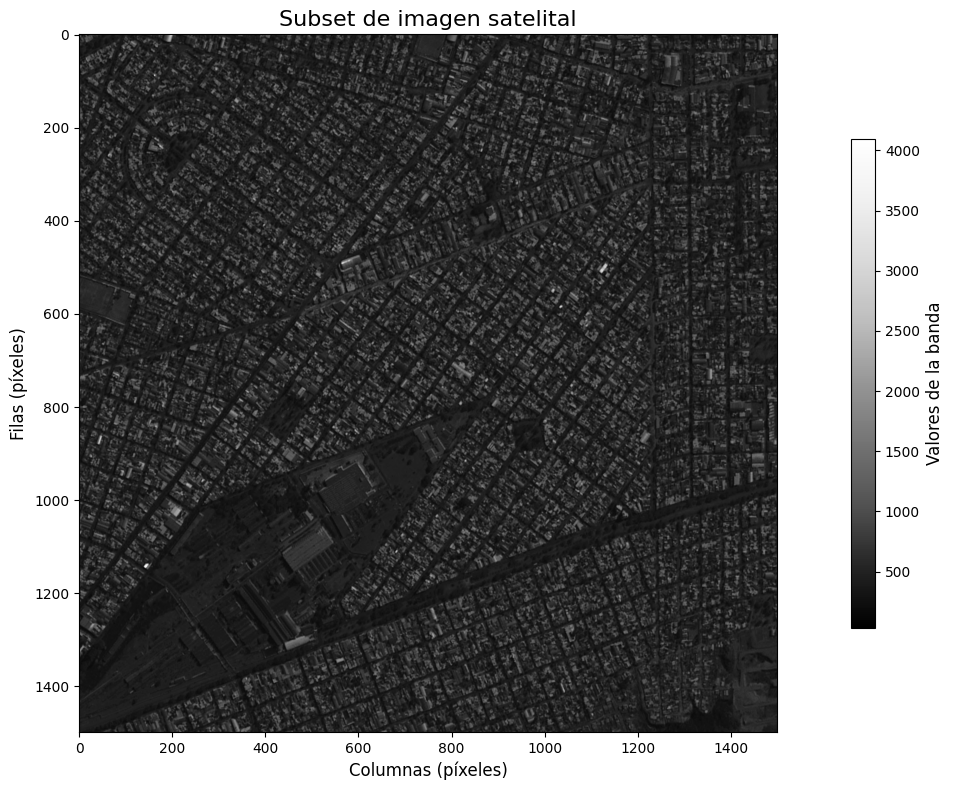

In [22]:
sds_subset = ds.GetRasterBand(1).ReadAsArray(x_off, y_off, win_xsize, win_ysize)

masked_array = np.ma.masked_where((sds_subset == 0) | (sds_subset == -9999), sds_subset)

cmap = plt.cm.Greys_r
cmap.set_bad(color="red")

fig, ax = plt.subplots(figsize=(15, 8))
im = ax.imshow(masked_array, cmap=cmap)

ax.set_title("Subset de imagen satelital", fontsize=16)
ax.set_xlabel("Columnas (píxeles)", fontsize=12)
ax.set_ylabel("Filas (píxeles)", fontsize=12)

cbar = plt.colorbar(im, ax=ax, shrink=0.7)
cbar.set_label("Valores de la banda", fontsize=12)

plt.tight_layout()
plt.show()

In [35]:
# Punto 2
def subset_img(ds, ulx, uly, lrx, lry):
    
    gt = ds.GetGeoTransform()
    origin_x, pixel_width, _, origin_y, _, pixel_height = gt

    x_off = int((ulx - origin_x) / pixel_width)
    y_off = int((origin_y - uly) / abs(pixel_height))

    win_xsize = int((lrx - ulx) / pixel_width)
    win_ysize = int((uly - lry) / abs(pixel_height))

    if x_off < 0 or y_off < 0 or (x_off + win_xsize) > ds.RasterXSize or (y_off + win_ysize) > ds.RasterYSize:
        raise ValueError("El subset está fuera de los límites del raster.")

    subset = ds.GetRasterBand(1).ReadAsArray(x_off, y_off, win_xsize, win_ysize)

    return subset

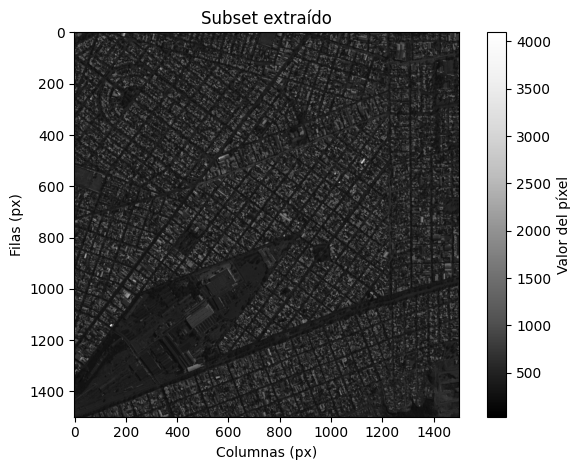

In [36]:
subset = subset_img(ds, ul_x, ul_y, lr_x, lr_y)

plt.imshow(subset, cmap='Greys_r')
plt.title("Subset extraído")
plt.xlabel("Columnas (px)")
plt.ylabel("Filas (px)")
plt.colorbar(label="Valor del píxel")
plt.tight_layout()
plt.show()

Otras de las opciones interesantes son _buf_xsize_ y _buf_ysize_ que nos permite remuestrear nuestra imagen de entrada a una matriz de dimensiones dadas por dichos parámetros:
```python
sds2 = ds.GetRasterBand(1).ReadAsArray(buf_xsize=ds.RasterXSize//3,
                                       buf_ysize=ds.RasterYSize//3,
                                       resample_alg=0)

print(sds[:6, :6])
print(sds2[:2, :2])
```

In [23]:
sds2 = ds.GetRasterBand(1).ReadAsArray(buf_xsize=ds.RasterXSize//3,
                                       buf_ysize=ds.RasterYSize//3,
                                       resample_alg=0)

print(sds[:6, :6])
print(sds2[:2, :2])

[[784 711 689 773 877 842]
 [865 771 678 669 689 627]
 [737 655 594 602 640 627]
 [499 470 499 562 634 655]
 [404 412 491 576 649 643]
 [392 423 523 610 667 624]]
[[771 689]
 [412 649]]


Más sobre métodos de remuestreo consultar:
```python
from osgeo import gdalconst
help(gdalconst)
```

In [24]:
from osgeo import gdalconst
help(gdalconst)

Help on module osgeo.gdalconst in osgeo:

NAME
    osgeo.gdalconst

DESCRIPTION
    # This file was automatically generated by SWIG (http://www.swig.org).
    # Version 4.0.2
    #
    # Do not make changes to this file unless you know what you are doing--modify
    # the SWIG interface file instead.

DATA
    CE_Debug = 1
    CE_Failure = 3
    CE_Fatal = 4
    CE_None = 0
    CE_Warning = 2
    CPLES_BackslashQuotable = 0
    CPLES_CSV = 4
    CPLES_SQL = 3
    CPLES_SQLI = 7
    CPLES_URL = 2
    CPLES_XML = 1
    CPLES_XML_BUT_QUOTES = 5
    CPLE_AWSAccessDenied = 14
    CPLE_AWSBucketNotFound = 12
    CPLE_AWSInvalidCredentials = 15
    CPLE_AWSObjectNotFound = 13
    CPLE_AWSSignatureDoesNotMatch = 16
    CPLE_AppDefined = 1
    CPLE_AssertionFailed = 7
    CPLE_FileIO = 3
    CPLE_HttpResponse = 11
    CPLE_IllegalArg = 5
    CPLE_NoWriteAccess = 8
    CPLE_None = 0
    CPLE_NotSupported = 6
    CPLE_ObjectNull = 10
    CPLE_OpenFailed = 4
    CPLE_OutOfMemory = 2
    CPLE_UserI

Veamos ahora el resultado de nuestras imágenes cargadas:

```python
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
ax[0].imshow(sds, cmap='Greys_r')
ax[0].set_title('Original')
ax[1].imshow(sds2, cmap='Greys_r')
ax[1].set_title('Remuestreada')
plt.show()
```

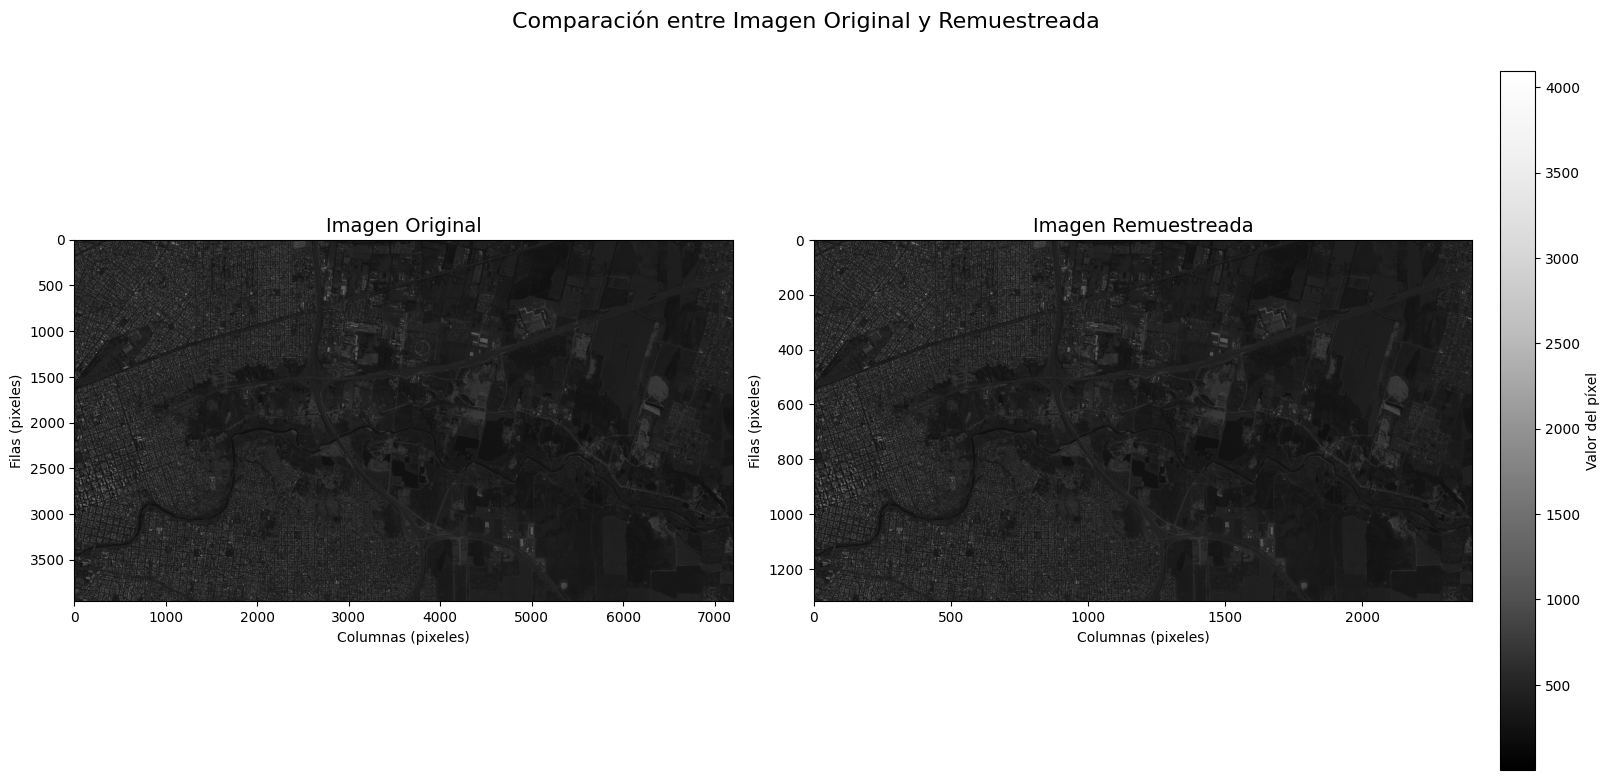

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8), constrained_layout=True)


im0 = ax[0].imshow(sds, cmap='Greys_r')
ax[0].set_title('Imagen Original', fontsize=14)
ax[0].set_xlabel('Columnas (pixeles)')
ax[0].set_ylabel('Filas (pixeles)')
ax[0].grid(False)



im1 = ax[1].imshow(sds2, cmap='Greys_r')
ax[1].set_title('Imagen Remuestreada', fontsize=14)
ax[1].set_xlabel('Columnas (pixeles)')
ax[1].set_ylabel('Filas (pixeles)')
ax[1].grid(False)


fig.colorbar(im1, ax=ax[:], orientation='vertical', fraction=0.025, pad=0.02, label='Valor del píxel')

fig.suptitle('Comparación entre Imagen Original y Remuestreada', fontsize=16)

plt.show()

También es posible obtener el tipo de dato _GDAL_ a partir de los valores contenidos en nuestro ***array*** como se muestra a continuación:

```python
from osgeo import gdal_array

print(colored('Tipo de dato del array:', 'blue'), sds.dtype, '\n')

print(colored('Código del tipo de de gdal:', 'blue'), gdal.GDT_UInt16, '\n')

gdalDType = gdal_array.NumericTypeCodeToGDALTypeCode(sds.dtype)

print(colored('Tipo de dato convertido a código gdal:', 'blue'), gdalDType)
```

In [28]:
from osgeo import gdal_array

print(colored('Tipo de dato del array:', 'blue'), sds.dtype, '\n')

print(colored('Código del tipo de gdal:', 'blue'), gdal.GDT_UInt16, '\n')

gdalDType = gdal_array.NumericTypeCodeToGDALTypeCode(sds.dtype)

print(colored('Tipo de dato convertido a código gdal:', 'blue'), gdalDType)

Tipo de dato del array: uint16 

Código del tipo de gdal: 2 

Tipo de dato convertido a código gdal: 2


# 3. Opciones de visualización

La visualización es un aspecto fundamental cuando queremos controlar de manera gráfica los resultados obtenidos (por ejemplo, valores más altos de un índice de vegetación en zonas boscosas que en el agua, visualización de clases obtenidas mediante clasificaciones, etc.). 

Anteriormente hemos visto la forma más básica de visualizar una imagen:

```python
ds = gdal.Open('../data/raw_data/SPOT_20170806_PAN.tif')
band_pan = ds.GetRasterBand(1)
sds_pan = band_pan.ReadAsArray(1000, 1000, 1500, 1500)

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(sds_pan, cmap='Greys_r')
plt.show()
```

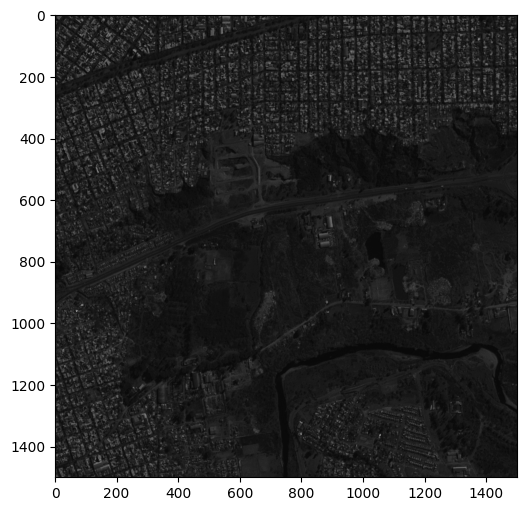

In [29]:
ds = gdal.Open('./raw_data/SPOT_20170806_PAN.tif')
band_pan = ds.GetRasterBand(1)
sds_pan = band_pan.ReadAsArray(1000, 1000, 1500, 1500)

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(sds_pan, cmap='Greys_r')
plt.show()

Podríamos incluso estimar el el _bounding box_ a partir de las geotransformaciones y adicionar los valores de coordenadas:

```python
# Calculamos los valores de coordenadas de los extremos
geoTs = ds.GetGeoTransform()
ulx = geoTs[0] + 1000 * geoTs[1]
uly = geoTs[3] + 1000 * geoTs[5]
lrx = ulx + 1500 * geoTs[1]
lry = uly + 1500 * geoTs[5]

# Si queremos guardar nuestro extent en alguna variable para
# utilizarlo más adelante:
mi_extent = [ulx, lrx, lry, uly]

# Graficamos haciendo uso del parámetro "extent"
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(sds_pan, cmap='Greys_r', extent=mi_extent)
ax.ticklabel_format(useOffset=False, style='plain')
plt.show()
```

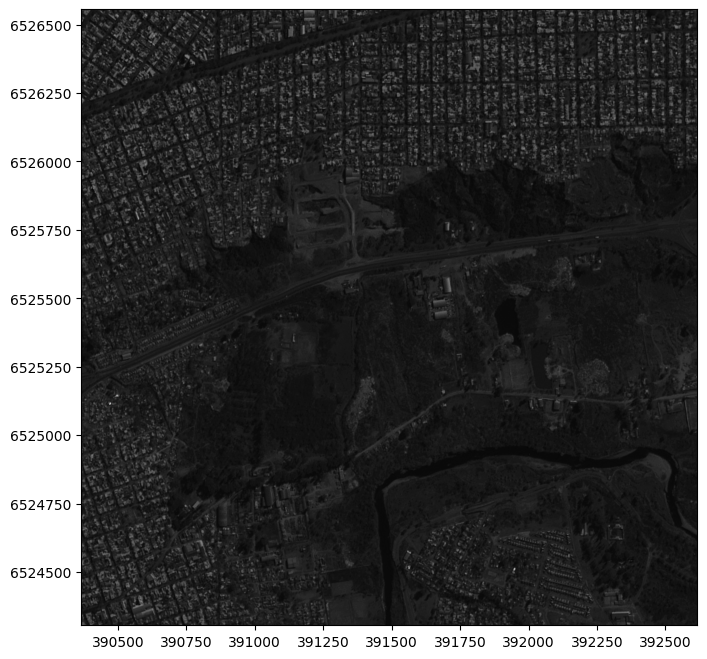

In [30]:
# Calculamos los valores de coordenadas de los extremos
geoTs = ds.GetGeoTransform()
ulx = geoTs[0] + 1000 * geoTs[1]
uly = geoTs[3] + 1000 * geoTs[5]
lrx = ulx + 1500 * geoTs[1]
lry = uly + 1500 * geoTs[5]

# Si queremos guardar nuestro extent en alguna variable para
# utilizarlo más adelante:
mi_extent = [ulx, lrx, lry, uly]

# Graficamos haciendo uso del parámetro "extent"
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(sds_pan, cmap='Greys_r', extent=mi_extent)
ax.ticklabel_format(useOffset=False, style='plain')
plt.show()

Esa figura es un poco básica y muy oscura, por lo tanto, vamos a aplicar algunos mecanismos de realce. Veamos la distribución de sus datos:

```python
plt.hist(sds_pan.ravel(), 50, facecolor='g', alpha=0.75)
plt.show()
```

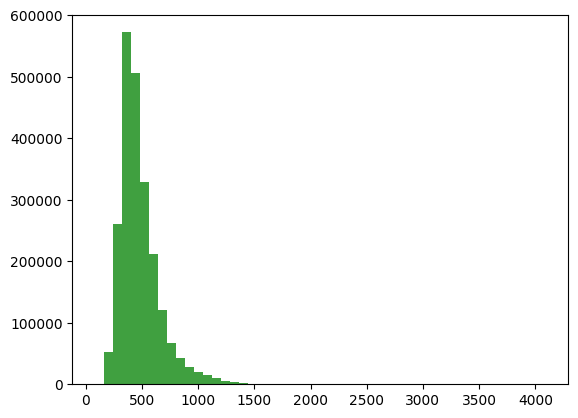

In [31]:
plt.hist(sds_pan.ravel(), 50, facecolor='g', alpha=0.75)
plt.show()

Como vemos, la mayoría de sus datos se encuentran aproximadamente entre 200 y 1500. Podríamos probar definir estos umbrales de visualización u obtenerlos por otros métodos como por ejemplo:

```python
# Calculando valores máximo y mínimo de la banda:
vmin_band = np.nanmin(sds_pan)
vmax_band = np.nanmax(sds_pan)

print(colored('Valor mínimo de la banda:', 'blue'), vmin_band, '\n')
print(colored('Valor máximo de la banda:', 'blue'), vmax_band, '\n')

# Definiendo umbrales personalizados:
vmin_user = 200
vmax_user = 1500

print(colored('Valor mínimo personalizado:', 'blue'), vmin_user, '\n')
print(colored('Valor máximo personalizado:', 'blue'), vmax_user, '\n')

# Calculando percentiles:
p1 = 1  # Definirá el umbral mínimo en %
p2 = 99  # Definirá el umbral máximo en %
vmin_perc, vmax_perc = np.percentile(sds_pan, (p1, p2))

print(colored('Valor mínimo estimado por percentiles:', 'blue'),
      vmin_perc, '\n')
print(colored('Valor máximo estimado por percentiles:', 'blue'),
      vmax_perc, '\n')

# Calculando los umbrales como media ± desvío estándar
std = np.std(sds_pan)
vmean = np.nanmean(sds_pan)
num_dev = 2
vmin_std = vmean - num_dev*std
vmax_std = vmean + num_dev*std

print(colored('Valor mínimo estimado por número de desvíos estándar:', 'blue'),
      vmin_std, '\n')
print(colored('Valor máximo estimado por número de desvíos estándar:', 'blue'),
      vmax_std, '\n')
```

In [32]:
# Calculando valores máximo y mínimo de la banda:
vmin_band = np.nanmin(sds_pan)
vmax_band = np.nanmax(sds_pan)

print(colored('Valor mínimo de la banda:', 'blue'), vmin_band, '\n')
print(colored('Valor máximo de la banda:', 'blue'), vmax_band, '\n')

# Definiendo umbrales personalizados:
vmin_user = 200
vmax_user = 1500

print(colored('Valor mínimo personalizado:', 'blue'), vmin_user, '\n')
print(colored('Valor máximo personalizado:', 'blue'), vmax_user, '\n')

# Calculando percentiles:
p1 = 1  # Definirá el umbral mínimo en %
p2 = 99  # Definirá el umbral máximo en %
vmin_perc, vmax_perc = np.percentile(sds_pan, (p1, p2))

print(colored('Valor mínimo estimado por percentiles:', 'blue'),
      vmin_perc, '\n')
print(colored('Valor máximo estimado por percentiles:', 'blue'),
      vmax_perc, '\n')

# Calculando los umbrales como media ± desvío estándar
std = np.std(sds_pan)
vmean = np.nanmean(sds_pan)
num_dev = 2
vmin_std = vmean - num_dev*std
vmax_std = vmean + num_dev*std

print(colored('Valor mínimo estimado por número de desvíos estándar:', 'blue'),
      vmin_std, '\n')
print(colored('Valor máximo estimado por número de desvíos estándar:', 'blue'),
      vmax_std, '\n')

Valor mínimo de la banda: 82 

Valor máximo de la banda: 4093 

Valor mínimo personalizado: 200 

Valor máximo personalizado: 1500 

Valor mínimo estimado por percentiles: 225.0 

Valor máximo estimado por percentiles: 1141.0 

Valor mínimo estimado por número de desvíos estándar: 115.7479554967864 

Valor máximo estimado por número de desvíos estándar: 845.0092720587692 



Graficando tendríamos:

```python
fig, ax = plt.subplots(2, 2, figsize=(10, 6))

ax[0, 0].hist(sds_pan.ravel(), 50, facecolor='g', alpha=0.75)
ax[0, 0].axvline(x=vmax_user, color='y', linestyle=':', linewidth=3)
ax[0, 0].axvline(x=vmin_user, color='y', linestyle=':', linewidth=3,
                 label='Umbral personalizado')

ax[0, 1].hist(sds_pan.ravel(), 50, facecolor='g', alpha=0.75)
ax[0, 1].axvline(x=vmax_band, color='y', linestyle=':', linewidth=3)
ax[0, 1].axvline(x=vmin_band, color='y', linestyle=':', linewidth=3,
                 label='Umbral valores mínimo y máximo')

ax[1, 0].hist(sds_pan.ravel(), 50, facecolor='g', alpha=0.75)
ax[1, 0].axvline(x=vmax_perc, color='y', linestyle=':', linewidth=3)
ax[1, 0].axvline(x=vmin_perc, color='y', linestyle=':', linewidth=3,
                 label='Umbral percentil 1-99')

ax[1, 1].hist(sds_pan.ravel(), 50, facecolor='g', alpha=0.75)
ax[1, 1].axvline(x=vmax_std, color='y', linestyle=':', linewidth=3)
ax[1, 1].axvline(x=vmin_std, color='y', linestyle=':', linewidth=3,
                 label='Umbral desvío estándar')

ax[0, 0].legend(loc=1)
ax[0, 1].legend(loc=1)
ax[1, 0].legend(loc=1)
ax[1, 1].legend(loc=1)

plt.show()
```

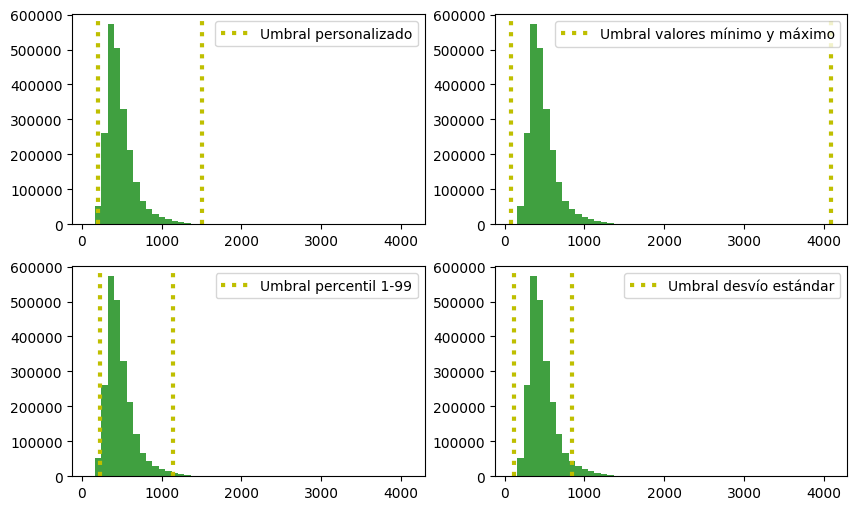

In [33]:
fig, ax = plt.subplots(2, 2, figsize=(10, 6))

ax[0, 0].hist(sds_pan.ravel(), 50, facecolor='g', alpha=0.75)
ax[0, 0].axvline(x=vmax_user, color='y', linestyle=':', linewidth=3)
ax[0, 0].axvline(x=vmin_user, color='y', linestyle=':', linewidth=3,
                 label='Umbral personalizado')

ax[0, 1].hist(sds_pan.ravel(), 50, facecolor='g', alpha=0.75)
ax[0, 1].axvline(x=vmax_band, color='y', linestyle=':', linewidth=3)
ax[0, 1].axvline(x=vmin_band, color='y', linestyle=':', linewidth=3,
                 label='Umbral valores mínimo y máximo')

ax[1, 0].hist(sds_pan.ravel(), 50, facecolor='g', alpha=0.75)
ax[1, 0].axvline(x=vmax_perc, color='y', linestyle=':', linewidth=3)
ax[1, 0].axvline(x=vmin_perc, color='y', linestyle=':', linewidth=3,
                 label='Umbral percentil 1-99')

ax[1, 1].hist(sds_pan.ravel(), 50, facecolor='g', alpha=0.75)
ax[1, 1].axvline(x=vmax_std, color='y', linestyle=':', linewidth=3)
ax[1, 1].axvline(x=vmin_std, color='y', linestyle=':', linewidth=3,
                 label='Umbral desvío estándar')

ax[0, 0].legend(loc=1)
ax[0, 1].legend(loc=1)
ax[1, 0].legend(loc=1)
ax[1, 1].legend(loc=1)

plt.show()

Veamos el resultado al aplicar cada uno de los realces:

```python
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

im1 = ax[0, 0].imshow(sds_pan, cmap='gray')
im2 = ax[0, 1].imshow(sds_pan, vmin=vmin_user, vmax=vmax_user, cmap='gray')
im3 = ax[1, 0].imshow(sds_pan, vmin=vmin_perc, vmax=vmax_perc, cmap='gray')
im4 = ax[1, 1].imshow(sds_pan, vmin=vmin_std, vmax=vmax_std, cmap='gray')

plt.colorbar(im1, ax=ax[0, 0])
plt.colorbar(im2, ax=ax[0, 1])
plt.colorbar(im3, ax=ax[1, 0])
plt.colorbar(im4, ax=ax[1, 1])

fig.suptitle('Umbrales utilizados')
ax[0, 0].set_title('Original min - max')
ax[0, 1].set_title('Personalizado')
ax[1, 0].set_title('Definido por Percentiles')
ax[1, 1].set_title('Definido por número de desvíos estándar')

ax[0, 0].set_axis_off()
ax[0, 1].set_axis_off()
ax[1, 0].set_axis_off()
ax[1, 1].set_axis_off()

fig.tight_layout()
plt.show()
```

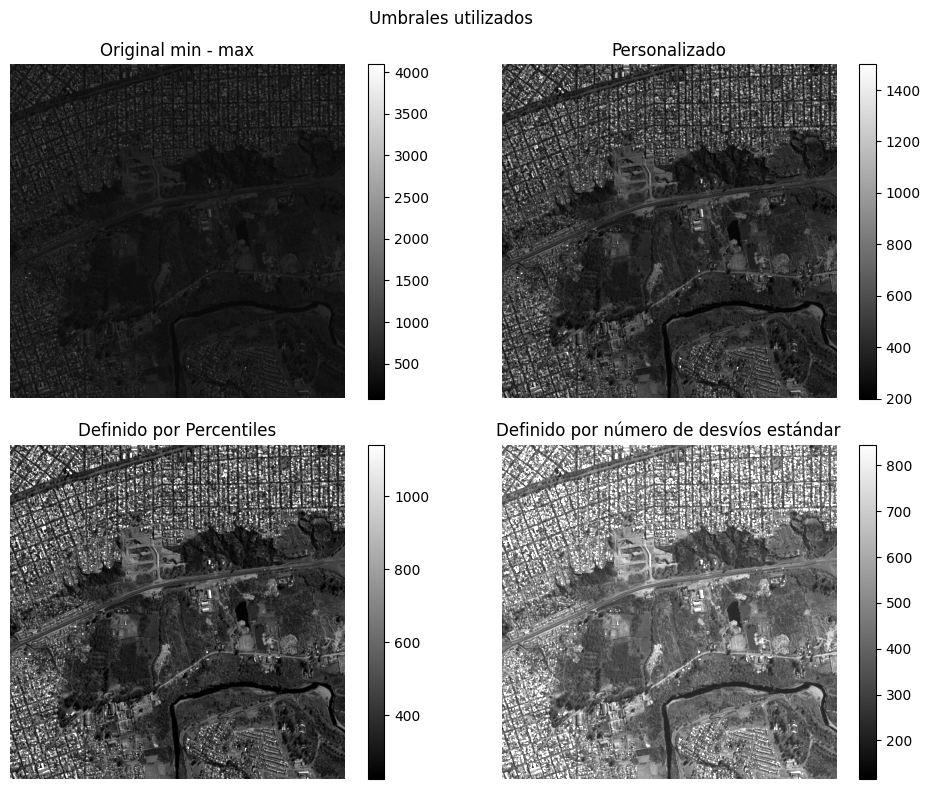

In [34]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

im1 = ax[0, 0].imshow(sds_pan, cmap='gray')
im2 = ax[0, 1].imshow(sds_pan, vmin=vmin_user, vmax=vmax_user, cmap='gray')
im3 = ax[1, 0].imshow(sds_pan, vmin=vmin_perc, vmax=vmax_perc, cmap='gray')
im4 = ax[1, 1].imshow(sds_pan, vmin=vmin_std, vmax=vmax_std, cmap='gray')

plt.colorbar(im1, ax=ax[0, 0])
plt.colorbar(im2, ax=ax[0, 1])
plt.colorbar(im3, ax=ax[1, 0])
plt.colorbar(im4, ax=ax[1, 1])

fig.suptitle('Umbrales utilizados')
ax[0, 0].set_title('Original min - max')
ax[0, 1].set_title('Personalizado')
ax[1, 0].set_title('Definido por Percentiles')
ax[1, 1].set_title('Definido por número de desvíos estándar')

ax[0, 0].set_axis_off()
ax[0, 1].set_axis_off()
ax[1, 0].set_axis_off()
ax[1, 1].set_axis_off()

fig.tight_layout()
plt.show()

### Ejercicio 3.1:

Crear una función llamada `scale(array, p)` a la que le pasemos un array en 2D y un valor opcional de percentil p . La idea es que la función escale el mismo a valores entre 0 y 1, tomando como mínimo el percentil p y como valor máximo a 100-p. El valor por defecto de p debe ser 0 La estructura deberá ser algo como:

```python
def scale(array, p=0):
    '''
    Descripción de la función
    '''
    vmin = ...
    vmax = ...

    scaled = ...

    return scaled
```

*Atención: Si usás p > 0, prestá atención a los valores por debajo y por encima de p ¿Qué cuidado especial debés tener con ellos para que todo quede escalado entre 0 y 1?*



In [37]:
def scale(array, p=0):
    '''
    Escala un array 2D entre 0 y 1, usando como mínimo el percentil p y como máximo el percentil 100 - p.
    
    Parámetros:
        array : numpy array 2D
        p     : percentil (entre 0 y 50). Si p = 0, se toma min y max reales del array.
    
    Retorna:
        scaled : array escalado entre 0 y 1

    Se elige un maximo de p = 50 porque si
    
    p = 60, por ejemplo, te daría:

    vmin = percentil 60

    vmax = percentil 40 → esto no puede ocurrir
    '''

    if not (0 <= p <= 50):
        
        raise ValueError("El percentil p debe estar entre 0 y 50.")

    vmin = np.percentile(array, p)
    vmax = np.percentile(array, 100 - p)

    if vmax == vmin:
        
        scaled = np.zeros_like(array, dtype='float32')
        
    else:
    
        array_clipped = np.clip(array, vmin, vmax)
        
        scaled = (array_clipped - vmin) / (vmax - vmin)

    return scaled

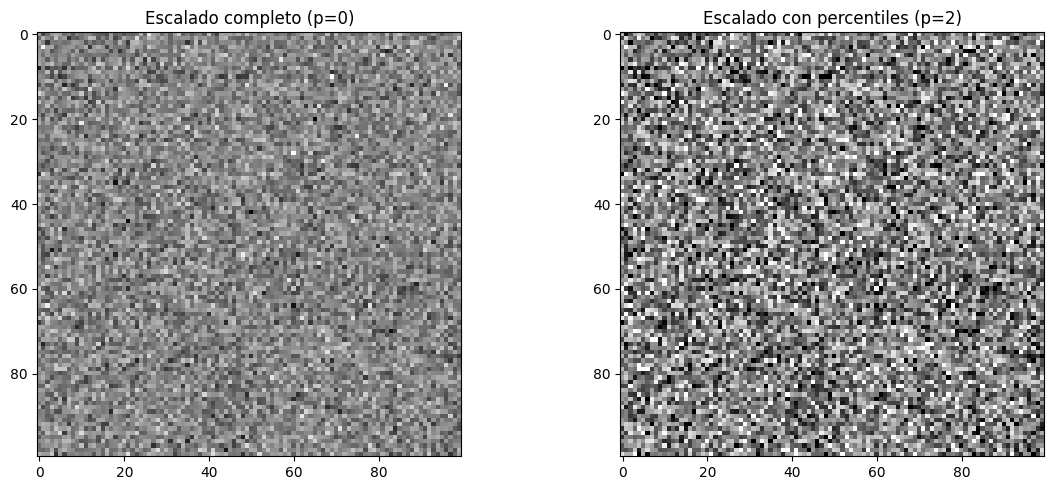

In [38]:
array = np.random.normal(loc=100, scale=20, size=(100, 100))

scaled_0 = scale(array)      
scaled_2 = scale(array, p=2)


fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].imshow(scaled_0, cmap="gray")
ax[0].set_title("Escalado completo (p=0)")
ax[1].imshow(scaled_2, cmap="gray")
ax[1].set_title("Escalado con percentiles (p=2)")
plt.tight_layout()
plt.show()

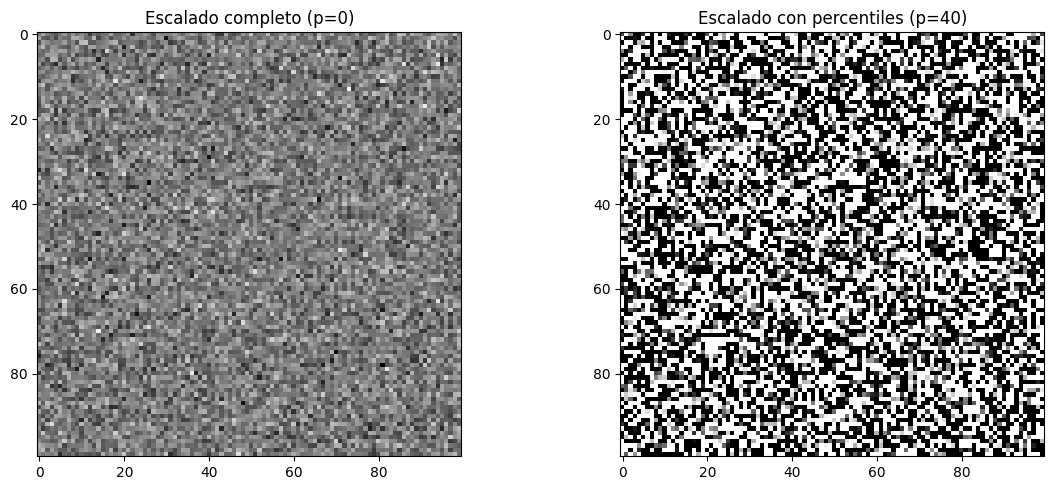

In [40]:
array = np.random.normal(loc=100, scale=20, size=(100, 100))

scaled_0 = scale(array)      
scaled_2 = scale(array, p=40)


fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].imshow(scaled_0, cmap="gray")
ax[0].set_title("Escalado completo (p=0)")
ax[1].imshow(scaled_2, cmap="gray")
ax[1].set_title("Escalado con percentiles (p=40)")
plt.tight_layout()
plt.show()

# 4. Cargando imágenes desde un zip:

Anteriormente vimos como hacer un listado de imágenes desde un archivo comprimido utilizando la librería "zipfile". Ahora vamos a ver un breve ejemplo de como cargarlas, para esto, vamos a reutilizar el código visto anteriormente pero nos quedaremos únicamente con la banda 2 de nuestra imagen Sentinel.

```python
from zipfile import ZipFile  # Importamos el módulo ZipFile

data_dir = '../data/raw_data/'
fn_zip = 'L1C_T21HUB_A017181_20181006T135109.zip'
zipfilename = data_dir + fn_zip

# El siguiente bloque realiza un listado recursivo
# de los archivos contenidos en nuestro .zip
with ZipFile(zipfilename, 'r') as zfile:
    banda = [i for i in zfile.namelist() if i.endswith('B02.jp2')][0]

banda
```

In [42]:
from zipfile import ZipFile  # Importamos el módulo ZipFile

data_dir = './raw_data/'
fn_zip = 'L1C_T21HUB_A023044_20191120T135113.zip'
zipfilename = data_dir + fn_zip

# El siguiente bloque realiza un listado recursivo
# de los archivos contenidos en nuestro .zip
with ZipFile(zipfilename, 'r') as zfile:    
    banda = [i for i in zfile.namelist() if i.endswith('B02.jp2')][0]

banda

'S2A_MSIL1C_20191120T135111_N0208_R024_T21HUB_20191120T152911.SAFE/GRANULE/L1C_T21HUB_A023044_20191120T135113/IMG_DATA/T21HUB_20191120T135111_B02.jp2'

Una vez tenemos nuestra banda, vamos a cargarla con "gdal", para lo que necesitaremos construir nuestra ruta de la siguiente manera:

```python
archivo = '/vsizip/' + 'ruta_nombre_archivo.zip' + '/' + 'ruta_nombre_imagen'
```

Entonces tenemos que:
```python
imagen = f'/vsizip/{zipfilename}/{banda}'
```

In [43]:
imagen = f'/vsizip/{zipfilename}/{banda}'

Ahora si vamos a cargar nuestra banda y, aplicando lo visto un poco más arriba, vamos a graficar un subset de la misma aplicando ajustando nuestro rango de datos a los percentiles 1, 99:

```python
# Cargamos nuestra banda con gdal
ds = gdal.Open(imagen)

# Leemos un subset de nuestra imagen
sds = ds.GetRasterBand(1).ReadAsArray(1000, 1000, 1500, 1500)

# Calculamos los valores mínimos y máximos para ajustar la visualización
vmin, vmax = np.percentile(sds, (1, 99))

# Graficamos nuestra imagen en escala de grises
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(sds, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()
```

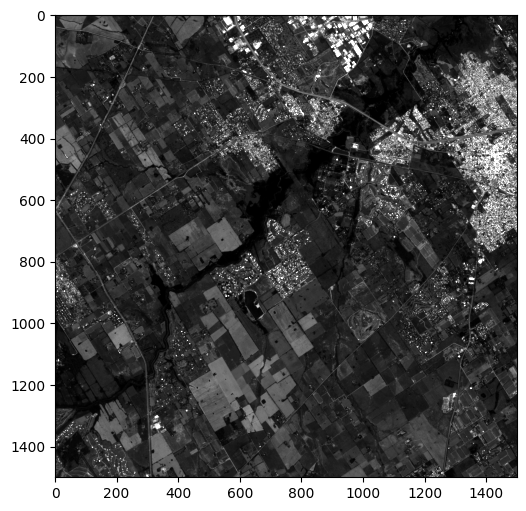

In [44]:
# Cargamos nuestra banda con gdal
ds = gdal.Open(imagen)

# Leemos un subset de nuestra imagen
sds = ds.GetRasterBand(1).ReadAsArray(1000, 1000, 1500, 1500)

# Calculamos los valores mínimos y máximos para ajustar la visualización
vmin, vmax = np.percentile(sds, (1, 99))

# Graficamos nuestra imagen en escala de grises
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(sds, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

# 5. Formato HDF

Es un formato ampliamente utilizado en el campo de la teledetección. Soporta varios tipos de datos como arrays, tablas o textos, siendo muy útil por ejemplo para el manejo de los metadatos, dado que estos se almacenan en el mismo archivo. Veamos esto con un ejemplo:

```python
# Importamos las librerías
from osgeo import gdal

# Definamos la imagen a utilizar:
img = '../data/raw_data/MOD09A1.A2000049.h11v08.006.2015136143404.hdf'
```

In [54]:
from osgeo import gdal

# Definamos la imagen a utilizar:
img = './raw_data/MOD09A1.A2000049.h11v08.006.2015136143404.hdf'

_gdal_ cuenta con una herramienta que nos permite rápidamente consultar los metadatos de las imágenes que queremos utilizar. Esta puede ser llamada desde consola haciendo uso del comando:
```
gdalinfo nombre_de_imagen
```
Adicionalmente, podemos hacer llamados a comandos de consola anteponiento el signo _!_, de la manera:
```
!gdalinfo nombre_de_imagen
```
Probemos:
```python
!gdalinfo ../data/raw_data/MOD09A1.A2000049.h11v08.006.2015136143404.hdf
```

In [55]:
!gdalinfo ./raw_data/MOD09A1.A2000049.h11v08.006.2015136143404.hdf

Driver: HDF4/Hierarchical Data Format Release 4
Files: ./raw_data/MOD09A1.A2000049.h11v08.006.2015136143404.hdf
Size is 512, 512
Metadata:
  ASSOCIATEDINSTRUMENTSHORTNAME.1=MODIS
  ASSOCIATEDPLATFORMSHORTNAME.1=Terra
  ASSOCIATEDSENSORSHORTNAME.1=MODIS
  AUTOMATICQUALITYFLAG.1=Passed
  AUTOMATICQUALITYFLAGEXPLANATION.1=Always Passed
  CHARACTERISTICBINANGULARSIZE250M=7.5
  CHARACTERISTICBINANGULARSIZE500M=15.0
  CHARACTERISTICBINSIZE250M=231.656358263889
  CHARACTERISTICBINSIZE500M=463.312716527778
  DATACOLUMNS250M=4800
  DATACOLUMNS500M=2400
  DATAROWS250M=4800
  DATAROWS500M=2400
  DAYNIGHTFLAG=Day
  DESCRREVISION=6.0
  EASTBOUNDINGCOORDINATE=-59.9916666612792
  EQUATORCROSSINGDATE.1=2000-02-24
  EQUATORCROSSINGDATE.2=2000-02-25
  EQUATORCROSSINGLONGITUDE.1=-69.0857783305285
  EQUATORCROSSINGLONGITUDE.2=-55.1883550622478
  EQUATORCROSSINGTIME.1=15:21:05.655042
  EQUATORCROSSINGTIME.2=14:25:30.976999
  EXCLUSIONGRINGFLAG.1=N
  GEOANYABNORMAL=False
  GEOESTMAXRMSERROR=50.0
  GLOBALGRI

Para consultar acerca de los productos MODIS, vaya al siguiente [enlace](https://lpdaac.usgs.gov/product_search/?collections=Combined+MODIS&collections=Terra+MODIS&collections=Aqua+MODIS&view=list)

Una vez tenemos el nombre de nuestro _dataset_, podríamos abrirlo como una imagen

```python
ds = gdal.Open('HDF4_EOS:EOS_GRID:"../data/raw_data/MOD09A1.A2000049.h11v08.006.2015136143404.hdf":MOD_Grid_500m_Surface_Reflectance:sur_refl_b01')
sds = ds.GetRasterBand(1).ReadAsArray()
```

In [56]:
ds = gdal.Open('HDF4_EOS:EOS_GRID:"./raw_data/MOD09A1.A2000049.h11v08.006.2015136143404.hdf":MOD_Grid_500m_Surface_Reflectance:sur_refl_b01')
sds = ds.GetRasterBand(1).ReadAsArray()

Prueben consultar la información de esta imagen de la misma manera que hicimos con el _geotiff_.

Graficando nuestra imagen tenemos:

```python
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(sds)
plt.show()
```

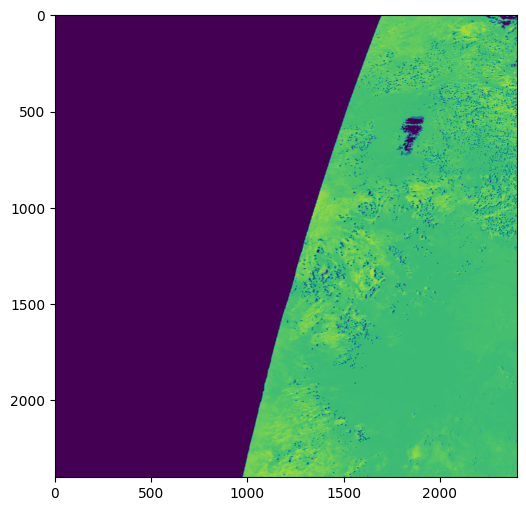

In [57]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(sds)
plt.show()

Una manera de obtener información directamente desde python y que facilite la automatización, es cargando el archivo completo y consultando el nombre de los _subdatasets_:

```python
image = gdal.Open(img)
subdatasets = image.GetSubDatasets()
del image
print(subdatasets)
```

In [58]:
image = gdal.Open(img)
subdatasets = image.GetSubDatasets()
del image
print(subdatasets)

[('HDF4_EOS:EOS_GRID:"./raw_data/MOD09A1.A2000049.h11v08.006.2015136143404.hdf":MOD_Grid_500m_Surface_Reflectance:sur_refl_b01', '[2400x2400] sur_refl_b01 MOD_Grid_500m_Surface_Reflectance (16-bit integer)'), ('HDF4_EOS:EOS_GRID:"./raw_data/MOD09A1.A2000049.h11v08.006.2015136143404.hdf":MOD_Grid_500m_Surface_Reflectance:sur_refl_b02', '[2400x2400] sur_refl_b02 MOD_Grid_500m_Surface_Reflectance (16-bit integer)'), ('HDF4_EOS:EOS_GRID:"./raw_data/MOD09A1.A2000049.h11v08.006.2015136143404.hdf":MOD_Grid_500m_Surface_Reflectance:sur_refl_b03', '[2400x2400] sur_refl_b03 MOD_Grid_500m_Surface_Reflectance (16-bit integer)'), ('HDF4_EOS:EOS_GRID:"./raw_data/MOD09A1.A2000049.h11v08.006.2015136143404.hdf":MOD_Grid_500m_Surface_Reflectance:sur_refl_b04', '[2400x2400] sur_refl_b04 MOD_Grid_500m_Surface_Reflectance (16-bit integer)'), ('HDF4_EOS:EOS_GRID:"./raw_data/MOD09A1.A2000049.h11v08.006.2015136143404.hdf":MOD_Grid_500m_Surface_Reflectance:sur_refl_b05', '[2400x2400] sur_refl_b05 MOD_Grid_500m

Como vemos, la información se encuentra almacenada en un listado de tuplas, donde cada tupla corresponde a un par (_nombre_imagen_, _descripcion_), por lo que podríamos hacer uso de lo visto con la librería _Pandas_ para ver nuestra información de una manera más clara:

```python
import pandas as pd
pd.options.display.max_colwidth = 77
df = pd.DataFrame(subdatasets, columns=['image', 'description'])
df
```

In [60]:
import pandas as pd

pd.options.display.max_colwidth = 77
df = pd.DataFrame(subdatasets, columns=['image', 'description'])
df

image  \
0   HDF4_EOS:EOS_GRID:"./raw_data/MOD09A1.A2000049.h11v08.006.2015136143404.h...   
1   HDF4_EOS:EOS_GRID:"./raw_data/MOD09A1.A2000049.h11v08.006.2015136143404.h...   
2   HDF4_EOS:EOS_GRID:"./raw_data/MOD09A1.A2000049.h11v08.006.2015136143404.h...   
3   HDF4_EOS:EOS_GRID:"./raw_data/MOD09A1.A2000049.h11v08.006.2015136143404.h...   
4   HDF4_EOS:EOS_GRID:"./raw_data/MOD09A1.A2000049.h11v08.006.2015136143404.h...   
5   HDF4_EOS:EOS_GRID:"./raw_data/MOD09A1.A2000049.h11v08.006.2015136143404.h...   
6   HDF4_EOS:EOS_GRID:"./raw_data/MOD09A1.A2000049.h11v08.006.2015136143404.h...   
7   HDF4_EOS:EOS_GRID:"./raw_data/MOD09A1.A2000049.h11v08.006.2015136143404.h...   
8   HDF4_EOS:EOS_GRID:"./raw_data/MOD09A1.A2000049.h11v08.006.2015136143404.h...   
9   HDF4_EOS:EOS_GRID:"./raw_data/MOD09A1.A2000049.h11v08.006.2015136143404.h...   
10  HDF4_EOS:EOS_GRID:"./raw_data/MOD09A1.A2000049.h11v08.006.2015136143404.h...   
11  HDF4_EOS:EOS_GRID:"./raw_data/MOD09A1.A2000049.h11v08.006.2015136143404.h...   
12  HDF4_EOS:EOS_GRID:"./raw_data/MOD09A1.A2000049.h11v08.006.2015136143404.h...   

                                                                     description  
0    [2400x2400] sur_refl_b01 MOD_Grid_500m_Surface_Reflectance (16-bit integer)  
1    [2400x2400] sur_refl_b02 MOD_Grid_500m_Surface_Reflectance (16-bit integer)  
2    [2400x2400] sur_refl_b03 MOD_Grid_500m_Surface_Reflectance (16-bit integer)  
3    [2400x2400] sur_refl_b04 MOD_Grid_500m_Surface_Reflectance (16-bit integer)  
4    [2400x2400] sur_refl_b05 MOD_Grid_500m_Surface_Reflectance (16-bit integer)  
5    [2400x2400] sur_refl_b06 MOD_Grid_500m_Surface_Reflectance (16-bit integer)  
6    [2400x2400] sur_refl_b07 MOD_Grid_500m_Surface_Reflectance (16-bit integer)  
7   [2400x2400] sur_refl_qc_500m MOD_Grid_500m_Surface_Reflectance (32-bit un...  
8   [2400x2400] sur_refl_szen MOD_Grid_500m_Surface_Reflectance (16-bit integer)  
9   [2400x2400] sur_refl_vzen MOD_Grid_500m_Surface_Reflectance (16-bit integer)  
10   [2400x2400] sur_refl_raz MOD_Grid_500m_Surface_Reflectance (16-bit integer)  
11  [2400x2400] sur_refl_state_500m MOD_Grid_500m_Surface_Reflectance (16-bit...  
12  [2400x2400] sur_refl_day_of_year MOD_Grid_500m_Surface_Reflectance (16-bi...

Con la información de las imágenes disponibles podríamos por ejemplo automatizar la búsqueda y carga de las bandas de interés. Vamos a cargar por ejemplo la banda 1 a partir de lo que se muestra en el _dataframe_.

```python
# Busquemos la información de nuestra banda de interés:
b01 = df.loc[df['description'].str.contains('b01'), 'image']  # Datos de acceso
b01[0]
```

In [61]:
b01 = df.loc[df['description'].str.contains('b01'), 'image']  # Datos de acceso
b01[0]

'HDF4_EOS:EOS_GRID:"./raw_data/MOD09A1.A2000049.h11v08.006.2015136143404.hdf":MOD_Grid_500m_Surface_Reflectance:sur_refl_b01'

Vamos a cargar nuestra imagen y a obtener la información de metadatos:
```python
ds = gdal.Open(b01[0])
ds.GetMetadata()
```

In [62]:
ds = gdal.Open(b01[0])
ds.GetMetadata()

{'add_offset': '0',
 'add_offset_err': '0',
 'ASSOCIATEDINSTRUMENTSHORTNAME.1': 'MODIS',
 'ASSOCIATEDPLATFORMSHORTNAME.1': 'Terra',
 'ASSOCIATEDSENSORSHORTNAME.1': 'MODIS',
 'AUTOMATICQUALITYFLAG.1': 'Passed',
 'AUTOMATICQUALITYFLAGEXPLANATION.1': 'Always Passed',
 'calibrated_nt': '5',
 'CHARACTERISTICBINANGULARSIZE250M': '7.5',
 'CHARACTERISTICBINANGULARSIZE500M': '15.0',
 'CHARACTERISTICBINSIZE250M': '231.656358263889',
 'CHARACTERISTICBINSIZE500M': '463.312716527778',
 'DATACOLUMNS250M': '4800',
 'DATACOLUMNS500M': '2400',
 'DATAROWS250M': '4800',
 'DATAROWS500M': '2400',
 'DAYNIGHTFLAG': 'Day',
 'DESCRREVISION': '6.0',
 'EASTBOUNDINGCOORDINATE': '-59.9916666612792',
 'EQUATORCROSSINGDATE.1': '2000-02-24',
 'EQUATORCROSSINGDATE.2': '2000-02-25',
 'EQUATORCROSSINGLONGITUDE.1': '-69.0857783305285',
 'EQUATORCROSSINGLONGITUDE.2': '-55.1883550622478',
 'EQUATORCROSSINGTIME.1': '15:21:05.655042',
 'EQUATORCROSSINGTIME.2': '14:25:30.976999',
 'EXCLUSIONGRINGFLAG.1': 'N',
 'GEOANYABNORMAL

Consultemos nuestro valor _nodata_:

```python
ds_band = ds.GetRasterBand(1)
print(colored('Valor para datos no válidos:', 'blue'))
print(ds_band.GetNoDataValue())
print(colored('Factor de escala:', 'blue'))
print(ds_band.GetScale())
```

In [63]:
ds_band = ds.GetRasterBand(1)
print(colored('Valor para datos no válidos:', 'blue'))
print(ds_band.GetNoDataValue())
print(colored('Factor de escala:', 'blue'))
print(ds_band.GetScale())

Valor para datos no válidos:
-28672.0
Factor de escala:
0.0001


Carguemos nuestro array:

```python
sds = ds_band.ReadAsArray()
```

In [64]:
sds = ds_band.ReadAsArray()

Grafiquemos nuestro array:

```python
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(sds)
plt.show()
```

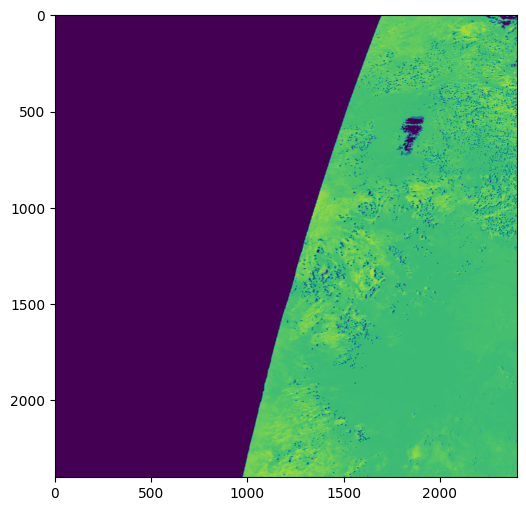

In [65]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(sds)
plt.show()

Podríamos construir a partir del nombre de entrada y la descripción, un nombre de salida representativo para nuestra banda. En este caso, vamos a formar algo como:

../data/out/MOD09A1.A2000049.h11v08.006.2015136143404_sur_refl_b01.tif

```python
import os

# Descripción de la banda:
b01_desc = df.loc[df['description'].str.contains('b01'), 'description']
print(colored('Descripción de la banda b01:\n', 'blue'), b01_desc[0])

input_basename = os.path.basename(img)
print(colored('Nombre base del archivo hdf:\n', 'blue'), input_basename)

# Vamos a agregarle parte de la descripción
band_desc = b01_desc[0].split(' ')[1]
print(colored('Texto que vamos a agregar:\n', 'blue'), band_desc)

output_path = '../data/out/'  # Directorio de salida
output_name = output_path + input_basename[:-4] + '_' + band_desc + '.tif'
print(colored('Nombre de archivo de salida:\n', 'blue'), output_name)
```

In [67]:
import os

# Descripción de la banda:
b01_desc = df.loc[df['description'].str.contains('b01'), 'description']
print(colored('Descripción de la banda b01:\n', 'blue'), b01_desc[0])

input_basename = os.path.basename(img)
print(colored('Nombre base del archivo hdf:\n', 'blue'), input_basename)

# Vamos a agregarle parte de la descripción
band_desc = b01_desc[0].split(' ')[1]
print(colored('Texto que vamos a agregar:\n', 'blue'), band_desc)

output_path = './out/'  # Directorio de salida
output_name = output_path + input_basename[:-4] + '_' + band_desc + '.tif'
print(colored('Nombre de archivo de salida:\n', 'blue'), output_name)

Descripción de la banda b01:
 [2400x2400] sur_refl_b01 MOD_Grid_500m_Surface_Reflectance (16-bit integer)
Nombre base del archivo hdf:
 MOD09A1.A2000049.h11v08.006.2015136143404.hdf
Texto que vamos a agregar:
 sur_refl_b01
Nombre de archivo de salida:
 ./out/MOD09A1.A2000049.h11v08.006.2015136143404_sur_refl_b01.tif


Profundizaremos en el guardado de las imágenes en la siguiente clase, extendiendo el concepto a ráster multibanda. Por ahora, un adelanto es extraer la información que necesitaremos:

- Nombre de salida (generado previamente)
- Número de bandas
- Número de filas y columnas
- GeoTransformaciones
- SRC
- Formato
- Tipo de dato

```python
bands = ds.RasterCount
cols = ds.RasterXSize
rows = ds.RasterYSize
geoTs = ds.GetGeoTransform()
prj = ds.GetProjection()
drv = gdal.GetDriverByName('GTiff')
gdalDType = gdal_array.NumericTypeCodeToGDALTypeCode(sds.dtype)
nodata = ds_band.GetNoDataValue()
scale_factor = float(dict(ds.GetMetadata())['scale_factor'])

print(colored('Nombre de archivo de salida:', 'blue'), output_name)
print(colored('Número de bandas:', 'blue'), bands)
print(colored('Geotransformaciones:', 'blue'), geoTs)
print(colored('SRC:', 'blue'), prj)
print(colored('Formato:', 'blue'), drv.LongName)
print(colored('Tipo de dato:', 'blue'), gdalDType)
# print(gdal.GDT_Int16)
print(colored('Columnas:', 'blue'), cols)
print(colored('Filas:', 'blue'), rows)
print(colored('Valor sin datos:', 'blue'), nodata)
print(colored('Factor de escala:', 'blue'), scale_factor)
```

In [68]:
bands = ds.RasterCount
cols = ds.RasterXSize
rows = ds.RasterYSize
geoTs = ds.GetGeoTransform()
prj = ds.GetProjection()
drv = gdal.GetDriverByName('GTiff')
gdalDType = gdal_array.NumericTypeCodeToGDALTypeCode(sds.dtype)
nodata = ds_band.GetNoDataValue()
scale_factor = float(dict(ds.GetMetadata())['scale_factor'])

print(colored('Nombre de archivo de salida:', 'blue'), output_name)
print(colored('Número de bandas:', 'blue'), bands)
print(colored('Geotransformaciones:', 'blue'), geoTs)
print(colored('SRC:', 'blue'), prj)
print(colored('Formato:', 'blue'), drv.LongName)
print(colored('Tipo de dato:', 'blue'), gdalDType)
# print(gdal.GDT_Int16)
print(colored('Columnas:', 'blue'), cols)
print(colored('Filas:', 'blue'), rows)
print(colored('Valor sin datos:', 'blue'), nodata)
print(colored('Factor de escala:', 'blue'), scale_factor)

Nombre de archivo de salida: ./out/MOD09A1.A2000049.h11v08.006.2015136143404_sur_refl_b01.tif
Número de bandas: 1
Geotransformaciones: (-7783653.637667, 463.3127165279169, 0.0, 1111950.519667, 0.0, -463.3127165279167)
SRC: PROJCS["unnamed",GEOGCS["Unknown datum based upon the custom spheroid",DATUM["Not specified (based on custom spheroid)",SPHEROID["Custom spheroid",6371007.181,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["Meter",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
Formato: GeoTIFF
Tipo de dato: 3
Columnas: 2400
Filas: 2400
Valor sin datos: -28672.0
Factor de escala: 0.0001


# 5. Formato NetCDF

NetCDF es un formato ampliamente utilizado en meteorologia y otras ciencias de la tierra. Al igual que el HDF posee una estructura interna que permite almacenar tanto los datos como sus metadatos. Una de las librerías que permite trabajar con este formato es _xarray_, que usaremos para visualizar imágenes del satélite meteorológico [GOES](https://www.goes-r.gov/).

Esta librería está diseñada para trabajar con datos multidimensionales etiquetados, similar a [NumPy](https://numpy.org/) pero con etiquetas y metadatos. Para ver esto, vamos a leer las imágenes GOES desde la subcarpeta del mismo nombre, localizada en _data/raw_data_:

```python
import os
#Generar la lista de archivos con listdir
input_folder = '../data/raw_data/GOES'
goes_files = os.listdir(input_folder)

print(goes_files)
```

In [69]:
import os
#Generar la lista de archivos con listdir
input_folder = './raw_data/GOES'
goes_files = os.listdir(input_folder)

print(goes_files)

['OR_ABI-L2-LSTF-M6_G16_s20230101000020.nc', 'OR_ABI-L2-LSTF-M6_G16_s20230101010020.nc', 'OR_ABI-L2-LSTF-M6_G16_s20230101020020.nc', 'OR_ABI-L2-LSTF-M6_G16_s20230101030020.nc', 'OR_ABI-L2-LSTF-M6_G16_s20230101040020.nc', 'OR_ABI-L2-LSTF-M6_G16_s20230101050020.nc', 'OR_ABI-L2-LSTF-M6_G16_s20230101060020.nc', 'OR_ABI-L2-LSTF-M6_G16_s20230101070020.nc', 'OR_ABI-L2-LSTF-M6_G16_s20230101080020.nc', 'OR_ABI-L2-LSTF-M6_G16_s20230101090020.nc', 'OR_ABI-L2-LSTF-M6_G16_s20230101100020.nc', 'OR_ABI-L2-LSTF-M6_G16_s20230101110020.nc', 'OR_ABI-L2-LSTF-M6_G16_s20230101120020.nc', 'OR_ABI-L2-LSTF-M6_G16_s20230101130020.nc', 'OR_ABI-L2-LSTF-M6_G16_s20230101140020.nc', 'OR_ABI-L2-LSTF-M6_G16_s20230101150020.nc', 'OR_ABI-L2-LSTF-M6_G16_s20230101160020.nc', 'OR_ABI-L2-LSTF-M6_G16_s20230101170020.nc', 'OR_ABI-L2-LSTF-M6_G16_s20230101180020.nc', 'OR_ABI-L2-LSTF-M6_G16_s20230101190020.nc', 'OR_ABI-L2-LSTF-M6_G16_s20230101200020.nc', 'OR_ABI-L2-LSTF-M6_G16_s20230101210020.nc', 'OR_ABI-L2-LSTF-M6_G16_s2023010

Leemos el primer archivo de la carpeta (elemento 0 de la lista) y lo abrimos con _xarray_ usando el método _open_dataset()_. Si imprimimos su contenido Jupyter Notebook nos permite navegar por la estructura del archivo de manera interactiva, y podemos ver cuáles son las variables o atributos para los cuales tiene información este archivo:

``` python
# Seleccionar el primer archivo de la lista
selected_file = goes_files[0]
selected_path = os.path.join(input_folder,selected_file)
print(selected_path)

# Importar el archivo con NetCDF
import xarray as xr
ds = xr.open_dataset(selected_path)
# Visualización de la estructura
ds
```

In [70]:
# Seleccionar el primer archivo de la lista
selected_file = goes_files[0]
selected_path = os.path.join(input_folder,selected_file)
print(selected_path)

# Importar el archivo con NetCDF
import xarray as xr
ds = xr.open_dataset(selected_path)
# Visualización de la estructura
ds

./raw_data/GOES\OR_ABI-L2-LSTF-M6_G16_s20230101000020.nc


<xarray.Dataset> Size: 14MB
Dimensions:                                 (y: 1086, x: 1086,
                                             number_of_time_bounds: 2,
                                             number_of_image_bounds: 2,
                                             number_of_LZA_bounds: 2,
                                             number_of_SZA_bounds: 2)
Coordinates:
    t                                       datetime64[ns] 8B ...
  * y                                       (y) float32 4kB 0.1519 ... -0.1519
  * x                                       (x) float32 4kB -0.1519 ... 0.1519
    y_image                                 float32 4B ...
    x_image                                 float32 4B ...
    retrieval_local_zenith_angle            float32 4B ...
    quantitative_local_zenith_angle         float32 4B ...
    solar_zenith_angle                      float32 4B ...
Dimensions without coordinates: number_of_time_bounds, number_of_image_bounds,
                                number_of_LZA_bounds, number_of_SZA_bounds
Data variables: (12/27)
    LST                                     (y, x) float32 5MB ...
    DQF                                     (y, x) float32 5MB ...
    PQI                                     (y, x) float32 5MB ...
    time_bounds                             (number_of_time_bounds) datetime64[ns] 16B ...
    goes_imager_projection                  int32 4B ...
    y_image_bounds                          (number_of_image_bounds) float32 8B ...
    ...                                      ...
    FPT_mitigation_flag                     float32 4B ...
    algorithm_dynamic_input_data_container  int32 4B ...
    processing_parm_version_container       int32 4B ...
    algorithm_product_version_container     int32 4B ...
    percent_uncorrectable_GRB_errors        float32 4B ...
    percent_uncorrectable_L0_errors         float32 4B ...
Attributes: (12/29)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    cdm_data_type:             Image
    time_coverage_start:       2023-01-01T00:00:20.6Z
    time_coverage_end:         2023-01-01T00:09:51.4Z
    timeline_id:               ABI Mode 6
    production_data_source:    Realtime
    id:                        64ee7e7a-d387-4256-9e41-03a041ca8838

A continuación nos quedamos con la variable Temperatura de superficie (LST) y la ploteamos. En lugar de usar simplemente _imshow()_, llamamos al método _plot()_ que es propio de los objetos _xarray_, el cual hace que la salida sea más fácilmente interpretable:

``` python
# Nos quedamos con la variable LST (Temperatura de Superficie)
variable_data = ds['LST']

# Ploteo
plt.figure(figsize=(6, 6))
variable_data.plot(cmap = "viridis")
# Show plot
plt.show()
```

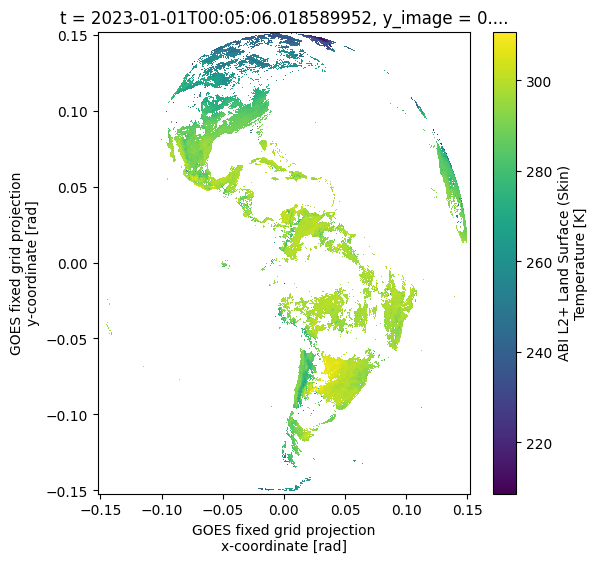

In [71]:
# Nos quedamos con la variable LST (Temperatura de Superficie)
variable_data = ds['LST']

# Ploteo
plt.figure(figsize=(6, 6))
variable_data.plot(cmap = "viridis")
# Show plot
plt.show()